In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# checking for duplicated
df.duplicated().sum()

1

In [18]:
df.loc[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,1
142,5.8,2.7,5.1,1.9,1


In [19]:
df.shape

(100, 5)

In [20]:
#dropping the duplicates
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(99, 5)

In [3]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Lets, just consider the problem to be binary classification for simpler logistic regression implementation.

In [4]:
df = df[df['species']!='setosa']

In [6]:
df.species.unique()

array(['versicolor', 'virginica'], dtype=object)

### Since the species column is categorical, converting it into numeric for machine learning.

In [8]:
df['species'] = df['species'].map({'versicolor':0,'virginica':1})

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Exploratory data analysis

In [21]:
# simple visualizations
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


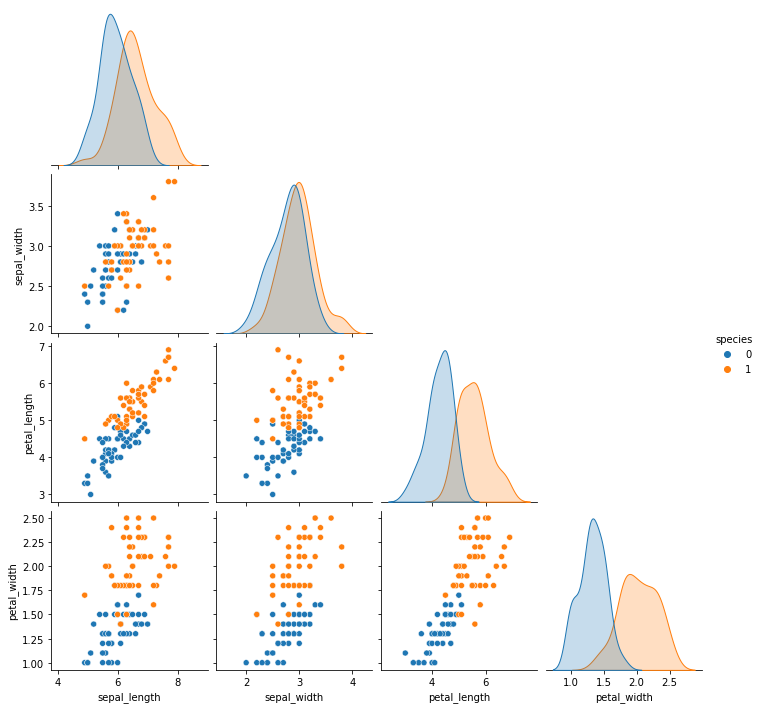

In [23]:
# Some exploratory data analysis
sns.pairplot(data=df, hue='species',corner=True)
plt.show()

<AxesSubplot:>

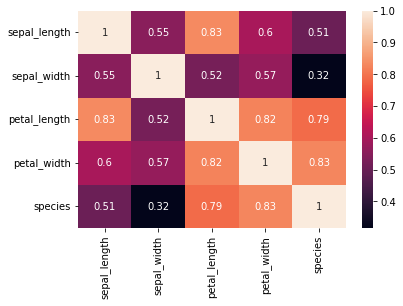

In [24]:
#correlation
sns.heatmap(df.corr(),annot=True)

### High correlations can be seen between the various features and features with the output from the heatmap above.

## Model implementation

In [27]:
# splitting the dataset
y = df.pop('species')
X = df
print(y)
print(X)

0     0
1     0
2     0
3     0
4     0
     ..
94    1
95    1
96    1
97    1
98    1
Name: species, Length: 99, dtype: int64
    sepal_length  sepal_width  petal_length  petal_width
0            7.0          3.2           4.7          1.4
1            6.4          3.2           4.5          1.5
2            6.9          3.1           4.9          1.5
3            5.5          2.3           4.0          1.3
4            6.5          2.8           4.6          1.5
..           ...          ...           ...          ...
94           6.7          3.0           5.2          2.3
95           6.3          2.5           5.0          1.9
96           6.5          3.0           5.2          2.0
97           6.2          3.4           5.4          2.3
98           5.9          3.0           5.1          1.8

[99 rows x 4 columns]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# logistic regressor
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, classification_report
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [32]:
train_preds = lr_classifier.predict(X_train)
accuracy_score(train_preds, y_train)

0.9594594594594594

In [33]:
print(classification_report(train_preds, y_train))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.97      0.95      0.96        40

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



In [35]:
test_preds = lr_classifier.predict(X_test)
print(accuracy_score(test_preds, y_test))
print(classification_report(test_preds, y_test))

0.96
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.90      1.00      0.95         9

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



## Hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV
lr_classifier = LogisticRegression()
parameters = {'penalty':['l1','l2','elastic_net'], 'C':[1,2,3,6,10,15,20,28,40],'max_iter':[50,100,120,200,1000]}
lrcCV = GridSearchCV(lr_classifier, param_grid=parameters, scoring='accuracy',cv=5)

In [38]:
lrcCV.fit(X_train,y_train)

C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 6, 10, 15, 20, 28, 40],
                         'max_iter': [50, 100, 120, 200, 1000],
                         'penalty': ['l1', 'l2', 'elastic_net']},
             scoring='accuracy')

In [40]:
print(lrcCV.best_params_)
print(lrcCV.best_score_)

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
0.96


In [41]:
preds = lrcCV.predict(X_test)

In [42]:
print(accuracy_score(preds,y_test))
print(classification_report(preds,y_test))

0.96
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.90      1.00      0.95         9

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



## Here, without hyperparameter tuning the accuracy was 95% but with hyperparameter tuning, the accuracy slightly increased t 96%.